# **🦹🏼Model訓練**

### 🧰 安裝工具箱

In [25]:
# 資料前處理
import os
from os import path
import jieba
from sklearn.model_selection import train_test_split # 用來切割資料集
from sklearn.preprocessing import LabelEncoder # 用來將標籤轉換成機器看得懂的格式
from sklearn import tree # 從sklearn的模型選擇工具箱裡面把用來訓練模型的工具拿出來
import pandas as pd # 用來開啟資料集
import re # 用來抓取或者清理資料中的資訊
# 抓取特徵
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# 訓練模型
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
# 評估模型
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_fscore_support, accuracy_score

def text_length(data):
  sentence_length=[]
  for comment in data:
    length=len(comment)
    sentence_length.append(length)
  return sentence_length

def frequency(data,regex):
  freq=[]
  for string in data:
      count = len(re.findall(regex, string))
      freq.append(count)
  return freq

def boolean(data, regex):
  boolean_list = []
  for comment in data:
    word_match = bool(re.search(regex, comment))
    boolean_list.append(word_match)
  return boolean_list

### 🪚 這是用來**斷詞**的

In [26]:
def segment(text):
  return jieba.lcut(text)

### 🔍 這是用來**抓取特徵**的

In [27]:
def feature_extract(text, vectorizer):
  # 將 list 元素轉換為字串
  text = [' '.join(tokens) for tokens in text]  
  matrix = vectorizer.fit_transform(text)
  array = vectorizer.get_feature_names_out()
  feature_df = pd.DataFrame(matrix.toarray(), columns = array)
  return feature_df

### ⚙️ 這是用來**訓練模型**的

In [28]:
class Model:
  def __init__(self, feature, label, model):
    self.feature = feature
    self.label = label
    self.model = model

  # 將 data 分為 training set & test set
  def split_data(self):
    self.feat_train, self.feat_test, self.label_train, self.label_test = train_test_split(self.feature, self.label, test_size=0.2, random_state = 123) # test_size=0.2表示test set佔20%

  # 用training set 訓練模型
  def model_train(self):
    self.model.fit(self.feat_train, self.label_train)

  # 用訓練好的模型預測 test set
  def model_predict(self):
    self.prediction = self.model.predict(self.feat_test)
    print('predicted result: ' + str(self.prediction))

  # 評估模型表現
  def model_evaluate(self):
    print(ConfusionMatrixDisplay.from_predictions(self.label_test, self.prediction, cmap = "Blues")) # 混淆矩陣
    evaluation = precision_recall_fscore_support(self.label_test, self.prediction, average='macro') # 計算 precision, recall, F-score
    accuracy = accuracy_score(self.label_test, self.prediction) # 計算 accuracy
    print("accuracy: " + str(round(accuracy, 2)) + "\nprecision: " + str(round(evaluation[0], 2)) + "\nrecall: " + str(round(evaluation[1], 2)) + "\nfscore: " + str(round(evaluation[2],2)))


 ### 🧻使用jieba做斷詞與刪除stopwords
   ##### 程式內容：
 - 載入停用詞和使用者字典
 - 使用jieba斷詞並移除斷詞中的停用詞，最後將處理後的結果存回內文欄位。

In [29]:
output = []
df_new = pd.DataFrame()
file = './src/jieba_clean_result.csv'
stopword = open("stopwords_zhTW.txt", "r", encoding='UTF-8').read()
stopword_list = stopword.split("\n")
df = pd.read_csv('./src/original_data.csv')
new_word = open("./src/my_dict.txt", "r", encoding='UTF-8').read()
jieba.load_userdict("./src/my_dict.txt")
for text in df['內文']:
  jieba_clean_result = []
  jieba_result = jieba.lcut(text)
  for token in jieba_result:
    if token not in stopword_list:
      jieba_clean_result.append(token)
  output.append(jieba_clean_result)
df_new['jieba_clean_result'] = output
df_new.to_csv(file,index=False)

### 📑 TF-IDF
一樣用`feature_extract()`的功能\
`TfidfVectorizer()` 是計算 TF-IDF 的工具

In [30]:
tfidf_feature = feature_extract(df_new['jieba_clean_result'], TfidfVectorizer(tokenizer = segment))
tfidf_feature

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,,##,#%,-&,-&_,--&,---,----,----++,-----,...,ｂ,ｃ,ｅ,ｉ,ｌ,ｎ,ｐ,ｒ,ｓ,ｕ
0,0.837315,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.849669,0.0,0.0,0.0,0.0,0.0,0.0,0.057318,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.718991,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.900121,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.867659,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,0.708266,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1322,0.808964,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1323,0.750640,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1324,0.899190,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.018125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## ⚙️ 訓練模型
我們使用五種分類模型：
- 決策樹 Decision Tree
- 隨機森林 Random Forest
- 羅吉斯迴歸 Logistic Regression
- 支援向量機 Support Vector Machine
- 多項式型樸素貝葉斯 Multinomial Naive Bayes

In [31]:
DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5 , random_state = 123)
RF = RandomForestClassifier(n_estimators = 120 , criterion = 'gini', max_depth = 10 , random_state = 123)
LR = LogisticRegression(random_state = 1223)
SVM = SVC(C=1, gamma='auto', kernel='linear', random_state = 123)
NB = MultinomialNB()

## ⚙️ Decision Tree

predicted result: [0 0 2 0 0 0 2 0 2 0 0 0 2 0 2 0 5 2 6 2 0 0 0 0 0 2 2 0 2 3 0 2 3 2 0 2 0
 0 0 0 0 0 0 3 0 0 0 0 3 5 0 0 0 0 0 0 0 2 0 2 0 3 2 2 0 2 0 0 0 2 0 2 2 0
 0 2 0 0 2 0 0 2 1 0 2 0 0 0 2 2 0 3 0 0 2 2 0 0 3 0 3 2 2 2 0 0 0 0 0 0 2
 2 0 0 0 0 3 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 3 0 3 0 2 0
 0 0 0 0 2 6 2 3 0 2 2 0 2 0 0 3 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2
 2 0 0 0 2 0 2 3 2 0 0 0 0 0 3 0 0 0 0 0 0 0 0 2 0 0 3 0 0 0 3 3 2 0 2 2 3
 0 0 0 0 1 0 2 3 0 0 3 5 0 0 3 0 2 0 0 0 2 6 3 0 3 0 0 2 0 0 5 3 0 2 2 0 0
 0 0 0 0 0 2 0]
accuracy: 0.48
precision: 0.4
recall: 0.28
fscore: 0.3


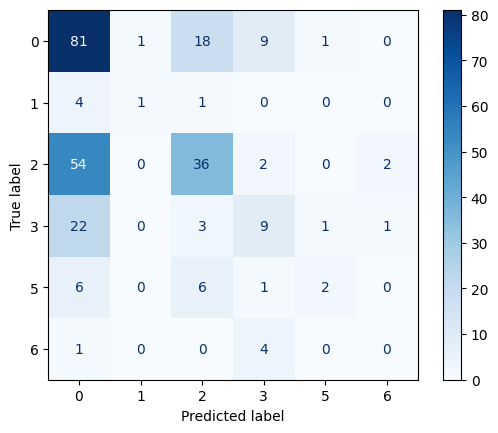

In [32]:
DT_model_bow = Model(tfidf_feature,df['label'], DT)  
DT_model_bow.split_data()  
DT_model_bow.model_train()  
DT_model_bow.model_predict()  
DT_model_bow.model_evaluate()

## ⚙️ Random Forest

predicted result: [2 0 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 0 2 0 0 0 0 2 2 2 0 0 0 0 2 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 2 0 0 0 0 0 0 0 2 2 0
 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 2 2 0 0 0 0 0 0 0 2
 2 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0
 0 0 0 0 0 0 2 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 2 0
 2 0 0 0 2 0 2 2 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 0 2 0 0
 0 0 0 0 0 2 0]
accuracy: 0.46
precision: 0.16
recall: 0.19
fscore: 0.16


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


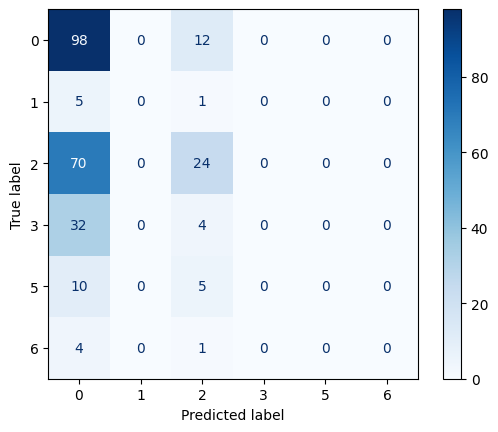

In [33]:
RF_model_bow = Model(tfidf_feature,df['label'], RF)  
RF_model_bow.split_data()  
RF_model_bow.model_train()  
RF_model_bow.model_predict()  
RF_model_bow.model_evaluate()

## ⚙️ Logistic Regression

predicted result: [0 0 2 0 0 0 0 2 2 0 2 0 2 0 2 0 0 2 0 2 0 0 0 0 2 0 2 0 0 0 0 2 0 2 0 2 0
 0 0 0 2 0 0 0 2 0 0 0 2 2 0 0 0 0 0 0 0 2 2 0 0 0 2 2 2 0 2 0 0 2 0 2 2 2
 0 0 0 0 0 2 0 2 0 0 0 2 0 0 2 2 0 0 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 0 0 2
 2 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 2 0 0 2 2 0 2 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2
 0 0 2 2 0 0 2 2 0 0 2 2 0 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 0 2 2 2 0
 2 0 0 2 0 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 2 0 0 0
 0 0 2 0 0 2 0]
accuracy: 0.5
precision: 0.17
recall: 0.21
fscore: 0.18


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


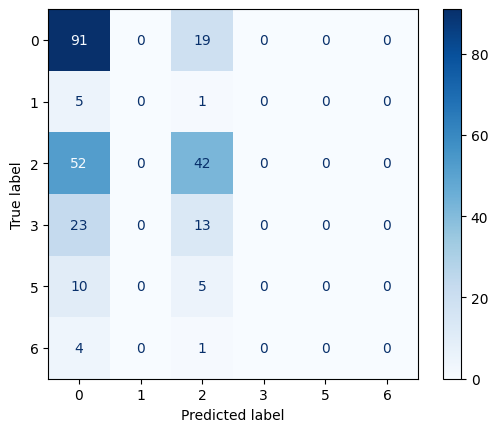

In [34]:
LR_model_bow = Model(tfidf_feature,df['label'], LR)  
LR_model_bow.split_data()  
LR_model_bow.model_train()  
LR_model_bow.model_predict()  
LR_model_bow.model_evaluate()

## ⚙️ Support Vector Machine

predicted result: [0 0 2 0 0 0 0 2 2 0 0 0 2 0 2 0 0 2 0 2 0 0 0 0 2 0 2 0 0 0 0 2 0 2 0 2 0
 0 0 0 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 2 0 2 2 2
 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 0 0 2
 2 0 0 0 0 0 2 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 2 0 0 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 2 2 0
 2 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 2 0 2 0 0 0
 0 0 0 0 0 2 0]
accuracy: 0.52
precision: 0.18
recall: 0.22
fscore: 0.19


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


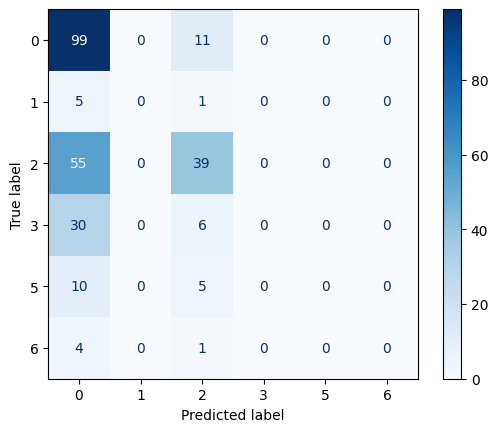

In [35]:
SVM_model_bow = Model(tfidf_feature,df['label'], SVM)  
SVM_model_bow.split_data()  
SVM_model_bow.model_train()  
SVM_model_bow.model_predict()  
SVM_model_bow.model_evaluate()

## ⚙️ Multinomial Naive Bayes

predicted result: [0 0 0 0 0 0 0 0 2 0 2 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 2 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]
accuracy: 0.49
precision: 0.19
recall: 0.2
fscore: 0.17


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


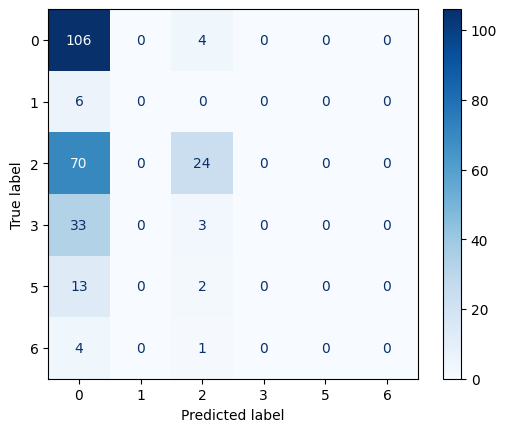

In [36]:
NB_model_bow = Model(tfidf_feature,df['label'], NB)  
NB_model_bow.split_data()  
NB_model_bow.model_train()  
NB_model_bow.model_predict()  
NB_model_bow.model_evaluate()